## Connecting to drive


In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_raw = pd.read_csv("original_data.csv")
df_clean = pd.read_csv("final_cleaned_data.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'original_data.csv'

In [ ]:
df_raw.to_csv("/content/drive/MyDrive/original_data.csv", index=False)
df_clean.to_csv("/content/drive/MyDrive/final_cleaned_data.csv", index=False)

##Creating links to allow to download the dirty and clean data


In [ ]:
# ORIGINAL DATA
share_url_original = "https://drive.google.com/file/d/1gczFgoexqozg0KCqer-lFTiFCbEkMkrA/view?usp=sharing"
download_url_original = (
    "https://drive.google.com/uc?export=download&id=" + share_url_original.split("/")[-2]
)
print("Original Data Download Link:")
print(download_url_original)
print()

# FINAL CLEANED DATA
share_url_final = "https://drive.google.com/file/d/1_dACJVK7afpHDJ8wYCjf4vinol-0Tfuz/view?usp=sharing"
download_url_final = (
    "https://drive.google.com/uc?export=download&id=" + share_url_final.split("/")[-2]
)
print("Final Cleaned Data Download Link:")
print(download_url_final)


## Data Collection / Scraping
#### Data Integration (merge sources into one dataset)
#### Uses web-scraping tools: requests + BeautifulSoup
#### Unifies data from multiple sources into one in-memory list

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import csv

# Create an empty list to store all results
all_data = []

# ==============================
# 🏘️ PART 1: myrealty.am
# ==============================
for page in range(1, 5):
    print(f"\n================ myrealty.am — Page {page} ================\n")

    url = f"https://myrealty.am/en/hot-offers/?page={page}"                        # headers is a dictionary of HTTP headers
    result = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}, timeout=20)  # "Mozilla/5.0" is a classic string that many browsers use
    print(result)                                                                  # By adding this,we pretend to be a normal browser

    soup = BeautifulSoup(result.text, "html.parser")
    cards = soup.find_all("div", class_="item-box")

    if not cards: #cards becomes a list of tags, each representing one appartment.
        print("⚠️ No cards found on this page — maybe JS-rendered or last page.")
        break

    for card in cards:
        address_tag = card.find("div", class_="item-address")                        # specifying the place where addresses are located in each card
        address = address_tag.get_text(strip=True) if address_tag else "No address"  # if address exists, saves it in "address"

        price_tag = card.find("div", class_="price")
        if not price_tag:
            price_tag = card.find("div", class_="item-price")
        price = price_tag.get_text(strip=True) if price_tag else "No price"

        area_tag = card.find("div", class_="item-sqm")
        area = area_tag.get_text(strip=True) if area_tag else "No area"

        date_icon = card.find("i", class_="fa fa-calendar")
        if date_icon:
            date = date_icon.find_next(text=True).strip()
        else:
            date = "No date"

        print("🏠 Address:", address)
        print("💰 Price:", price)
        print("📏 Area (m²):", area)
        print("📅 Date:", date)
        print("-" * 60)

        all_data.append(["myrealty.am", address, price, area, date])

    time.sleep(1)

# ==============================
# 🏢 PART 2: realtors.am
# ==============================
for page in range(1, 15):
    print(f"\n================ realtors.am — Page {page} ================\n")

    url = f"https://realtors.am/en/search/2/sale-apartment/?page={page}"
    result = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}, timeout=20)
    print(result)

    soup = BeautifulSoup(result.text, "html.parser")
    cards = soup.find_all("div", class_="caption")

    if not cards:
        print("⚠️ No cards found on this page")
        break

    for card in cards:
        address_tag = card.find("div", class_="address")
        address = address_tag.get_text(strip=True) if address_tag else "No address"

        price_tag = card.find("div", class_="price")
        if not price_tag:
            price_tag = card.find("div", class_="price")
        price = price_tag.get_text(strip=True) if price_tag else "No price"

        area_tag = card.find("div", class_="sqm")
        area = area_tag.get_text(strip=True) if area_tag else "No area"

        date_icon = card.find("span", class_="item_date")
        if date_icon:
            date = date_icon.find_next(text=True).strip()
        else:
            date = "No date"

        print("🏠 Address:", address)
        print("💰 Price:", price)
        print("📏 Area (m²):", area)
        print("📅 Date:", date)
        print("-" * 60)

        all_data.append(["realtors.am", address, price, area, date]) #saving the data in our empty list

    time.sleep(1)

# ==============================
# 💾 Save combined data
# ==============================
with open("original_data.csv", "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Source", "Address", "Price", "Area (m²)", "Date"])
    writer.writerows(all_data)

print("\n All data saved successfully to apartments_combined.csv!")



================ myrealty.am — Page 1 ================

<Response [200]>
🏠 Address: Tumanyan St, Center, Yerevan
💰 Price: 230,000
📏 Area (m²): 40SQ. M.
📅 Date: 20.11.2025
------------------------------------------------------------
🏠 Address: Tumanyan St, Center, Yerevan
💰 Price: 230,000
📏 Area (m²): 40SQ. M.
📅 Date: 20.11.2025
------------------------------------------------------------
🏠 Address: Tumanyan St, Center, Yerevan
💰 Price: 230,000
📏 Area (m²): 40SQ. M.
📅 Date: 20.11.2025
------------------------------------------------------------
🏠 Address: Azatutyan Ave, Arabkir, Yerevan
💰 Price: 93,000
📏 Area (m²): 40SQ. M.
📅 Date: 13.07.2025
------------------------------------------------------------
🏠 Address: Azatutyan Ave, Arabkir, Yerevan
💰 Price: 93,000
📏 Area (m²): 40SQ. M.
📅 Date: 13.07.2025
------------------------------------------------------------
🏠 Address: Azatutyan Ave, Arabkir, Yerevan
💰 Price: 93,000
📏 Area (m²): 40SQ. M.
📅 Date: 13.07.2025
---------------------------

/tmp/ipython-input-2787452786.py:40: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  date = date_icon.find_next(text=True).strip()



================ myrealty.am — Page 2 ================

<Response [200]>
🏠 Address: Aghbyur Serob St, Arabkir, Yerevan
💰 Price: 260,000
📏 Area (m²): 109SQ. M.
📅 Date: 24.01.2025
------------------------------------------------------------
🏠 Address: Aghbyur Serob St, Arabkir, Yerevan
💰 Price: 260,000
📏 Area (m²): 109SQ. M.
📅 Date: 24.01.2025
------------------------------------------------------------
🏠 Address: Gyurjyan St, Nor-Nork, Yerevan
💰 Price: 143,000
📏 Area (m²): 94SQ. M.
📅 Date: 08.12.2025
------------------------------------------------------------
🏠 Address: Emineski St, Kanaqer-Zeytun, Yerevan
💰 Price: 125,000
📏 Area (m²): 83SQ. M.
📅 Date: 12.11.2025
------------------------------------------------------------
🏠 Address: Sasna Tsrer St, Davtashen, Yerevan
💰 Price: 306,000
📏 Area (m²): 91SQ. M.
📅 Date: 10.04.2024
------------------------------------------------------------
🏠 Address: Sasna Tsrer St, Davtashen, Yerevan
💰 Price: 306,000
📏 Area (m²): 91SQ. M.
📅 Date: 10.04.20

/tmp/ipython-input-2787452786.py:85: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  date = date_icon.find_next(text=True).strip()



================ realtors.am — Page 2 ================

<Response [200]>
🏠 Address: Arabkir, Arabkir 49 St
💰 Price: $249,000
📏 Area (m²): 77M²
📅 Date: 19.12.2025
------------------------------------------------------------
🏠 Address: Arabkir, Baghramyan av(Arabkir)
💰 Price: $410,000
📏 Area (m²): 187M²
📅 Date: 19.12.2025
------------------------------------------------------------
🏠 Address: Arabkir, Baghramyan av(Arabkir)
💰 Price: $410,000
📏 Area (m²): 187M²
📅 Date: 19.12.2025
------------------------------------------------------------
🏠 Address: Arabkir, Baghramyan av(Arabkir)
💰 Price: $410,000
📏 Area (m²): 187M²
📅 Date: 19.12.2025
------------------------------------------------------------
🏠 Address: Malatia-Sebastia, Leningradyan st.
💰 Price: $225,000
📏 Area (m²): 80M²
📅 Date: 19.12.2025
------------------------------------------------------------
🏠 Address: Malatia-Sebastia, Leningradyan st.
💰 Price: $225,000
📏 Area (m²): 80M²
📅 Date: 19.12.2025
---------------------------------

## Data Cleaning

#### Handle inconsistencies / text-to-numeric (Price):
#### Handle missing values (Area & Price):
#### Outlier handling (Area):
#### Inconsistency cleanup (Address):

In [ ]:
import pandas as pd
import numpy as np
import re

# =========================================
# CONFIG: input (raw) and output (cleaned)
# =========================================
INPUT_CSV  = "original_data.csv"
OUTPUT_CSV = "cleaned_data.csv"
PLAUSIBLE_BOUNDS = (8, 500)  # m² min/max

# =========================================
# LOAD: read the raw scraped dataset
# =========================================
df = pd.read_csv(INPUT_CSV)

# =========================================
# COLUMN DISCOVERY
# =========================================
canon = lambda s: re.sub(r'[^a-z0-9]+', '', str(s).strip().lower())             #gives to the csv columns cannonical names : " Price (AMD) " → "priceamd"
c2o = {}
for col in df.columns:                                                          #creates a mapping from a simplifie"canonical" version of each column name to the original column name in the CSV
    c2o.setdefault(canon(col), col)

def find_col(cands):                                                            #function finds the real name of the column, from the possible variants : candidates
    for c in cands:
        if c in c2o:
            return c2o[c]
    for want in cands:                                                          #if "price" is a part of "priceamd" or "area" a part of "arem2"
        for have, orig in c2o.items():                                          #we take  the origin
            if want in have:
                return orig
    return None

price_col  = find_col(["price"])    or (_ for _ in ()).throw(ValueError("Price column not found"))
source_col = find_col(["source"])   or (_ for _ in ()).throw(ValueError("Source column not found"))
area_col   = find_col(["area","aream2","aream"]) or (_ for _ in ()).throw(ValueError("Area column not found"))
addr_col   = find_col(["address"])  or (_ for _ in ()).throw(ValueError("Address column not found"))

# =========================================
# PRICE CLEANING
# =========================================
price_raw = df[price_col].astype("string")


#make all letters lowercase, delate all spaces, searching if the line contains words "request" or "month": as we are interested only in buying not renting
bad_mask = price_raw.str.lower().str.replace(r"\s+","",regex=True).str.contains("request|month", na=False)


#if x is NaN return np.nan else ,we delate everything except numbers from price column
only_digits = lambda x: (np.nan if pd.isna(x) else (int(d) if (d:=re.sub(r"[^0-9]","",str(x))) else np.nan))


#if our bad_mask is ture we put NaN ,if it's false we leave the original value and meake sure everything is numeric
df["_Price_clean"] = pd.to_numeric(price_raw.mask(bad_mask, np.nan).apply(only_digits), errors="coerce")



def mode_or_median(s: pd.Series):
    s = pd.to_numeric(s, errors="coerce").dropna()
    if s.empty:
        return np.nan
    m = s.mode(dropna=True)
    return float(m.iloc[0]) if not m.empty else float(s.median())                                     # IF mode exists → return first mode, else return median



per_source = df.groupby(source_col)["_Price_clean"].apply(mode_or_median).to_dict()                   #we group by their source, for each source we count typical price
global_fill = mode_or_median(df["_Price_clean"])



def fill_price(row):                                                                                  # Decides what price to use when the scraped price was empty or "price on request".
    v = row["_Price_clean"]                                                                           # takes cleaned price value, stores it in v
    if pd.isna(v):                                                                                    # if it is NaN , we fill it by the most typical price of the source it belongs to
        cand = per_source.get(row[source_col], np.nan)
        v = cand if not pd.isna(cand) else global_fill
    return (np.nan if pd.isna(v) else int(round(v)))


df[price_col] = pd.to_numeric(df.apply(fill_price, axis=1), errors="coerce").astype("Int64")          #we impliment the function above to every raw



# =========================================
# PRICE OUTLIERS (simple filter)
# =========================================
ABSOLUTE_MAX = 1_000_000
before = len(df)                                                                                      #number of raws before filtering
df = df[(df[price_col].isna()) | (df[price_col] <= ABSOLUTE_MAX)].copy()                              #leave the prices that are NaN or less than 1000000
print(f"Removed {before - len(df)} rows with Price > {ABSOLUTE_MAX}")



# =========================================
# AREA CLEANING
# =========================================
def clean_area_str(s: pd.Series):
    s = s.astype(str)
    s = s.str.replace(r"(?i)q\.?\s*m\.?", "", regex=True)                                             #delate all variants of "Q. M.", "q m", "qm" (?i means case insensitive)
    s = s.str.replace(r"[mM]²", "", regex=True)                                                       # delate also "m²" or "M²"
    s = s.str.strip().str.replace(r"[^0-9,.\-]", "", regex=True).str.replace(",", ".", regex=False)   # delate all the letters and symbols, leave only numbers ,commas and dots
    return s

area_num = pd.to_numeric(clean_area_str(df[area_col]), errors="coerce")
area_num[(~np.isfinite(area_num)) | (area_num <= 0)] = np.nan                                         #if area is inf or negative it goes to trash
lo, hi = PLAUSIBLE_BOUNDS                                                                             # setting lo=8 and hi=500
area_num[(area_num < lo) | (area_num > hi)] = np.nan                                                  # every appartment less than 8mq or more than 500mq is set as NaN

area_median = area_num.median()
area_num = area_num.fillna(area_median)                                                               #filling all the NaNs of area columns by the median

q1, q3 = area_num.quantile(0.25), area_num.quantile(0.75)
iqr = q3 - q1                                                                                         #Interquartile Range: middle spread” of data or how wide the “normal zone” is
if iqr > 0:
    area_num = area_num.clip(q1 - 1.5*iqr, q3 + 1.5*iqr)                                              #This creates a normal, allowed range. If value < lower bound → FORCE it to lower bound
                                                                                                      #If value > upper bound → FORCE it to upper bound
df[area_col] = area_num.round().astype("Int64")



# =========================================
# ADDRESS → DISTRICT
# =========================================
pattern1 = re.compile(r",\s*([^,]+?)\s*,\s*Yerevan", re.IGNORECASE)                                    #pattern1 is for addresses that have Yerevan at the end ,It extracts DISTRICT — the text between the two commas.
pattern2 = re.compile(r"^\s*([^,]+?)\s*,\s*[^,]*\b(St|Street)\b", re.IGNORECASE)                       #handles addresses starting with the district,It extracts the word(s) BEFORE the first comma

def extract_district(addr):
    if not isinstance(addr, str) or not addr.strip():                                                  #if address is empty or not a strinf -> NaN
        return np.nan
    addr = addr.strip()                                                                                #If pattern1 matched
    m1 = pattern1.search(addr)                                                                         #return m1.group(1) = the captured district
    if m1:
        return m1.group(1).strip()
    m2 = pattern2.search(addr)
    if m2:                                                                                             #If pattern2 matched
        return m2.group(1).strip()                                                                     #return m2.group(1).strip()
    parts = [p.strip() for p in addr.split(",") if p.strip()]
    if len(parts) >= 3:                                                                                #if both regex fail, we just split by commas and take 2nd word(most likely it will be the district)
        return parts[-2]
    if len(parts) == 2:
        return parts[0] if not re.search(r"\b(St|Street)\b", parts[0], re.I) else parts[1]
    return addr

df[addr_col] = df[addr_col].apply(extract_district)



# =========================================
# SAVE
# =========================================
df.drop(columns=[c for c in ["_Price_clean","_Price_filled"] if c in df.columns], inplace=True, errors="ignore")
df.to_csv(OUTPUT_CSV, index=False)

print("Cleaning completed successfully!")
print("Price: numeric, invalids → per-source mode (fallback median/global), outliers removed.")
print(f"Area: integers, bounds [{lo},{hi}], median = {int(area_median)} m².")
print("Address: replaced with district via regex patterns (myrealty + realtors).")
print(f"Saved as '{OUTPUT_CSV}'")



Removed 12 rows with Price > 1000000
Cleaning completed successfully!
Price: numeric, invalids → per-source mode (fallback median/global), outliers removed.
Area: integers, bounds [8,500], median = 88 m².
Address: replaced with district via regex patterns (myrealty + realtors).
Saved as 'cleaned_data.csv'


## Data Preprocessing
#### Feature engineering: price_per_sqm , log_price = ln(Price)
#### Data encoding : District_encoded
#### Price cleanup (text → numeric integers):
#### Data transformation: Normalization and standardization
#### Time-Series Preprocessing: price_lag & price_roll


In [ ]:
import pandas as pd
import numpy as np

# Load
df = pd.read_csv("cleaned_data.csv")

#  Clean Price and Area
df["Price"] = (
    df["Price"].astype(str)                                                         #Converts all values in Price to strings.
    .str.replace(r"[^0-9]", "", regex=True)                                         #removes all non-digit characters.
    .replace("", np.nan)
    .astype(float)
    .round()                                                                        # round decimals
    .astype("Int64")                                                                # convert to integer (keeps NaN support)
)
df["Area (m²)"] = pd.to_numeric(df["Area (m²)"], errors="coerce")                   #Converts the column to numeric (float).

# Feature Engineering
mask = (df["Price"] > 0) & (df["Area (m²)"] > 0)                                    #mask is a boolean condition
df["price_per_sqm"] = np.where(mask, df["Price"] / df["Area (m²)"], np.nan)         #If mask == True → Price / Area,
df["log_price"] = np.where(df["Price"] > 0, np.log(df["Price"]), np.nan)            #If Price > 0:compute natural log (makes distribution more normal-like)
df["price_per_sqm"] = df["price_per_sqm"].round(4)
df["log_price"] = df["log_price"].round(4)

#  District Encoding
df["District_encoded"] = df["Address"].astype("category").cat.codes                 #Converts the Address column into a categorical type.(Replaces each category (district name) with an integer code.)

#  Normalization (0–1 range)
for col in ["Price", "Area (m²)", "price_per_sqm"]:
    col_min, col_max = df[col].min(), df[col].max()
    df[col + "_norm"] = ((df[col] - col_min) / (col_max - col_min)).round(4)        #Converts all values to a range from 0 to 1:

#  Standardization (mean=0, std=1)
for col in ["Price", "Area (m²)", "price_per_sqm"]:
    mean, std = df[col].mean(), df[col].std()
    df[col + "_std"] = ((df[col] - mean) / std).round(2)                            #This is z-score standardization:values above average → positive numbers,values below average → negative numbers

#  Time-Series Features
df["Date"] = pd.to_datetime(df["Date"], format="%d.%m.%Y", errors="coerce")         #Turns Date from string to a datetime object
df = df.sort_values("Date")                                                         #Orders the dataset from earliest → latest
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["price_lag_1"] = df["Price"].shift(1)                                            #For each row, you see the price of the previous listing.
df["price_roll_5"] = df["Price"].rolling(window=5, min_periods=1).mean().round(2)   #Looks at the last 5 rows,Computes the average,Smooths the data

# Save Final Dataset
df.to_csv("final_cleaned_data.csv", index=False)

print("✅ Data preprocessing complete — features, encoding, normalization, standardization, time-series added.")
print(df.head(10))


✅ Data preprocessing complete — features, encoding, normalization, standardization, time-series added.
          Source   Address   Price  Area (m²)       Date  price_per_sqm  \
20   myrealty.am    Center  298000        107 2021-02-24      2785.0467   
19   myrealty.am    Center  298000        107 2021-02-24      2785.0467   
18   myrealty.am    Center  298000        107 2021-02-24      2785.0467   
49   myrealty.am  Nor-Nork  750000         88 2022-06-17      8522.7273   
110  myrealty.am    Center  800000        135 2023-05-19      5925.9259   
134  myrealty.am    Center  279000         42 2023-07-27      6642.8571   
132  myrealty.am    Center  350000         98 2023-07-28      3571.4286   
115  myrealty.am    Center  280000         50 2023-08-17      5600.0000   
77   myrealty.am    Center  260000        101 2023-09-08      2574.2574   
124  myrealty.am      Avan  650000         88 2023-10-03      7386.3636   

     log_price  District_encoded  Price_norm  Area (m²)_norm  \
20     

## Data Analysis
### mean, median, mode, and standard deviation for numerical features.


# Most apartments in Yerevan cost around 244$ on average.

About 25 % of listings are priced below 155 k $, 50 % below 210 k $, and 75 % below 290 k $.

The average area is roughly 91 m², with typical prices around 2 760 $/m².
The data shows moderate variation, with a few more expensive apartments pulling the mean slightly above the median.

In [ ]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv("final_cleaned_data.csv")

#  Show summary for key numeric columns
print("📊 SUMMARY STATISTICS FOR NUMERIC FEATURES\n")
print(df[["Price", "Area (m²)", "price_per_sqm"]].describe().round(2))

#  Individual stats for Price
price_mean = df["Price"].mean()
price_median = df["Price"].median()
price_mode = df["Price"].mode()[0]
price_std = df["Price"].std()

print("\n💰 PRICE STATISTICS:")
print(f"Mean: {int(price_mean)} ")
print(f"Median: {int(price_median)} ")
print(f"Mode: {int(price_mode)} ")
print(f"Standard Deviation: {int(price_std)} ")



📊 SUMMARY STATISTICS FOR NUMERIC FEATURES

           Price  Area (m²)  price_per_sqm
count     636.00     636.00         636.00
mean   248136.01      90.20        2815.35
std    144279.62      31.51        1314.72
min     81000.00      31.00         993.59
25%    152000.00      69.00        1945.21
50%    210000.00      88.00        2432.43
75%    298000.00     107.00        3263.16
max    990000.00     164.00       11250.00

💰 PRICE STATISTICS:
Mean: 248136 
Median: 210000 
Mode: 310000 
Standard Deviation: 144279 


### Distribution Analysis

1.There is a long tail on the right side because a few apartments are extremely expensive compared to the rest.

2.Many outliers:There are very expensive outliers that stand far away from the main group of prices these outliers stretch the graph and make it uneven.

The Price variable is not normally distributed because there are many cheaper apartments and only a few very expensive ones, which create a long tail and make the distribution uneven.

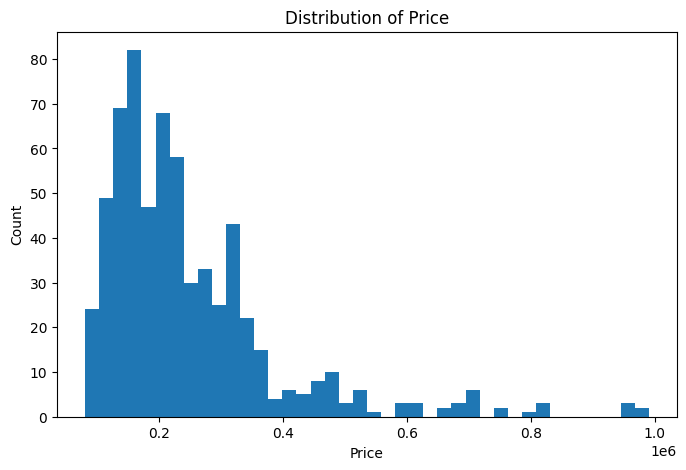

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("final_cleaned_data.csv")

plt.figure(figsize=(8,5))
plt.hist(df["Price"], bins=40)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

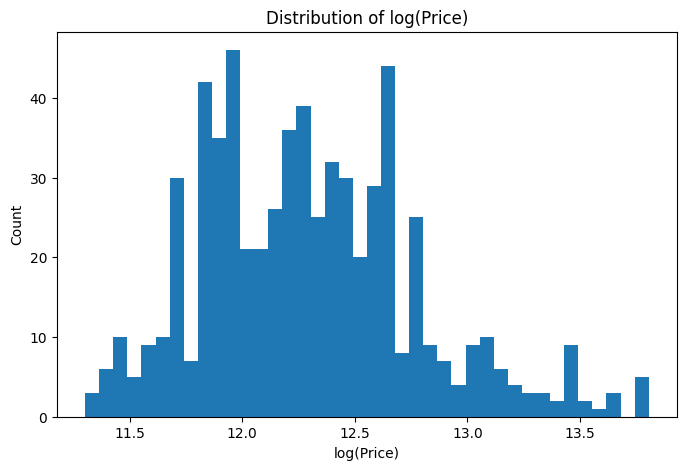

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df["log_price"], bins=40)
plt.title("Distribution of log(Price)")
plt.xlabel("log(Price)")
plt.ylabel("Count")
plt.show()


### Hypothesis Testing : t-test


H₀ (null hypothesis): There is no significant difference in the average price per m² between small and large apartments.

H₁ (alternative):Small apartments have a significantly higher price per m² than large ones.

t-statistic : Shows how big the difference between groups is.

p-value : Probability that this difference happened by chance.

If p-value < 0.05, the difference is statistically significant.

In [ ]:
import pandas as pd
from scipy import stats

# Load dataset
df = pd.read_csv("final_cleaned_data.csv")

# Define groups
small = df[df["Area (m²)"] < 80]["price_per_sqm"].dropna()
large = df[df["Area (m²)"] >= 80]["price_per_sqm"].dropna()

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(small, large, equal_var=False)

print("📊 Hypothesis Test: Small vs Large Apartments (Price per m²)")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("❌ Reject H₀ → Significant difference found.")
    print("➡️ Smaller apartments tend to cost more per m².")
else:
    print("✅ Fail to reject H₀ → No significant difference detected.")


📊 Hypothesis Test: Small vs Large Apartments (Price per m²)
T-statistic: 2.719
P-value: 0.00675
❌ Reject H₀ → Significant difference found.
➡️ Smaller apartments tend to cost more per m².


###Data Visualization: Scatter Plots

Plot 1 — Area (m²) vs Price:
Shows how apartment size affects total cost.
Trend: larger apartments generally have higher prices.

Plot 2 — Area (m²) vs Price per sqm:
Examines how unit price changes with size.
Trend: smaller apartments usually have a higher price per sqm.

Plot 3 — Price per sqm vs Price:
Highlights the relationship between unit and total prices.
Observation: clusters indicate typical market ranges, while isolated points may represent luxury or overpriced listings.

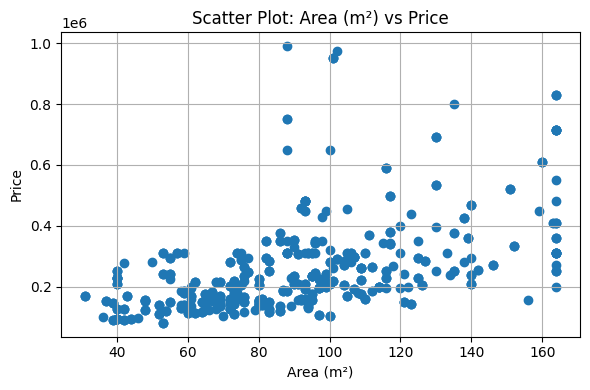

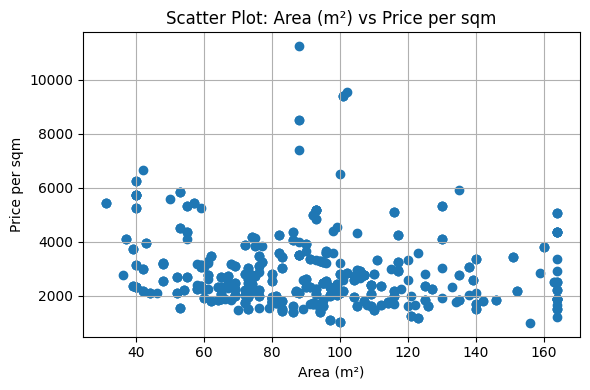

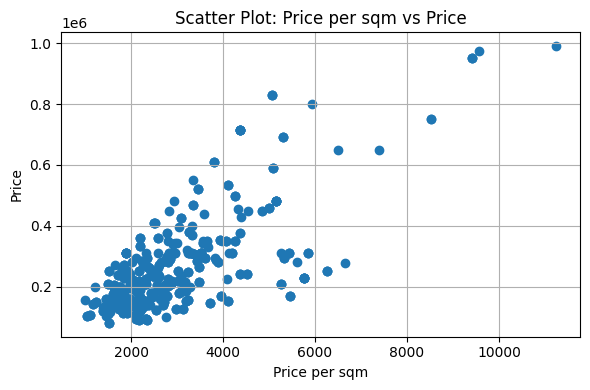

 Scatter plots created successfully!

n_rows_total               636.0000
n_rows_used_for_plot       636.0000
Price_min                81000.0000
Price_max               990000.0000
Area_min                    31.0000
Area_max                   164.0000
price_per_sqm_min          993.5897
price_per_sqm_max        11250.0000
dtype: float64


In [ ]:
# ============================================
# Data Visualization: Scatter Plots
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===  Load the most recent dataset ===
# Change filename if needed
df = pd.read_csv("final_cleaned_data.csv")

# === Ensure required numeric columns exist ===
df["Price"] = (
    df["Price"]
    .astype(str)
    .str.replace(r"[^0-9]", "", regex=True)
    .replace("", np.nan)
    .astype(float)
)
df["Area (m²)"] = pd.to_numeric(df["Area (m²)"], errors="coerce")

if "price_per_sqm" not in df.columns:
    mask = (df["Price"] > 0) & (df["Area (m²)"] > 0)
    df["price_per_sqm"] = np.where(mask, df["Price"] / df["Area (m²)"], np.nan)

# Keep only valid numeric rows
df_plot = df[(df["Price"] > 0) & (df["Area (m²)"] > 0)].copy()

# ===  Scatter Plot 1: Area vs Price ===
plt.figure(figsize=(6,4))
plt.scatter(df_plot["Area (m²)"], df_plot["Price"])
plt.xlabel("Area (m²)")
plt.ylabel("Price")
plt.title("Scatter Plot: Area (m²) vs Price")
plt.grid(True)
plt.tight_layout()
plt.show()

# ===  Scatter Plot 2: Area vs Price per sqm ===
plt.figure(figsize=(6,4))
plt.scatter(df_plot["Area (m²)"], df_plot["price_per_sqm"])
plt.xlabel("Area (m²)")
plt.ylabel("Price per sqm")
plt.title("Scatter Plot: Area (m²) vs Price per sqm")
plt.grid(True)
plt.tight_layout()
plt.show()

# ===  Scatter Plot 3: Price per sqm vs Price ===
plt.figure(figsize=(6,4))
plt.scatter(df_plot["price_per_sqm"], df_plot["Price"])
plt.xlabel("Price per sqm")
plt.ylabel("Price")
plt.title("Scatter Plot: Price per sqm vs Price")
plt.grid(True)
plt.tight_layout()
plt.show()

# ===  Quick numeric summary (optional) ===
summary = {
    "n_rows_total": len(df),
    "n_rows_used_for_plot": len(df_plot),
    "Price_min": df_plot["Price"].min(),
    "Price_max": df_plot["Price"].max(),
    "Area_min": df_plot["Area (m²)"].min(),
    "Area_max": df_plot["Area (m²)"].max(),
    "price_per_sqm_min": df_plot["price_per_sqm"].min(),
    "price_per_sqm_max": df_plot["price_per_sqm"].max(),
}
print(" Scatter plots created successfully!\n")
print(pd.Series(summary))


###Histograms and Density Plots

Histogram:
Shows how values are distributed across ranges.
Used to detect clusters, gaps, and extreme values.

Density Plot:
Smooth curve showing overall data shape.
Helps identify if the distribution is normal or skewed.

Interpretation:
Right-skewed distributions indicate many low-value apartments and few expensive outliers.
Helps understand spread and variability before deeper analysis.

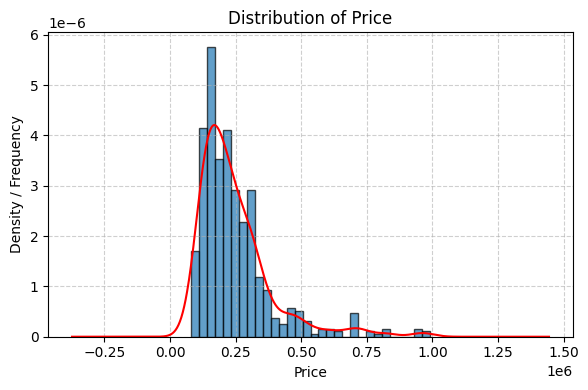

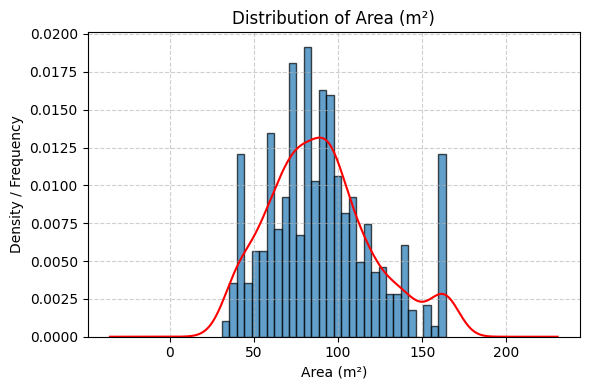

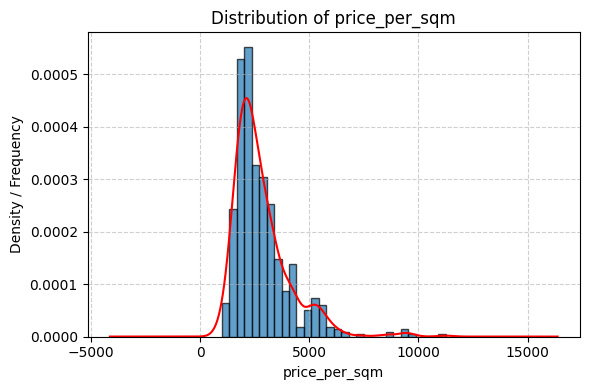

✅ Histograms and density plots created successfully!

           Price  Area (m²)  price_per_sqm
count     636.00     636.00         636.00
mean   248136.01      90.20        2815.35
std    144279.62      31.51        1314.72
min     81000.00      31.00         993.59
25%    152000.00      69.00        1945.21
50%    210000.00      88.00        2432.43
75%    298000.00     107.00        3263.16
max    990000.00     164.00       11250.00


In [ ]:
# ============================================
# Data Visualization: Histograms & Density Plots
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===  Load dataset (replace filename if needed) ===
df = pd.read_csv("final_cleaned_data.csv")

# ===  Ensure numeric columns exist and clean ===
numeric_cols = ["Price", "Area (m²)", "price_per_sqm"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# === Create Histograms and Density Plots ===
for col in numeric_cols:
    data = df[col].dropna()
    if data.empty:
        continue

    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=30, edgecolor='black', alpha=0.7, density=True)
    data.plot(kind='kde', color='red')  # Density curve overlay
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Density / Frequency")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# === 4️⃣ Optional: Quick numeric summary ===
summary = df[numeric_cols].describe().round(2)
print("✅ Histograms and density plots created successfully!\n")
print(summary)


### Heat Maps

Correlation Coefficient (r):
Measures how strongly two numerical variables are related (from −1 to 1).

Positive correlation (r → 1):
Both variables increase together (e.g., Price and Area).

Negative correlation (r → −1):
One variable increases while the other decreases.

Interpretation:
The darker the cell, the stronger the correlation.
Heat maps make it easy to see which variables move together or in opposite directions.

In [ ]:
# ============================================
# Data Visualization: Correlation Heat Map
# ============================================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Load a prepared dataset
candidates = [
    "final_cleaned_data.csv",
    "cleaned_data.csv",
]
for path in candidates:
    if os.path.exists(path):
        df = pd.read_csv(path)
        print(f"Loaded: {path}")
        break
else:
    raise FileNotFoundError("No dataset file found. Upload a CSV or adjust the filenames.")

# 2) Select numeric columns
num_df = df.select_dtypes(include=["number"])

cols_to_remove = [
    "price_roll_5",
    "price_lag_1",
    "month",
    "year",
    "price_per_sqm_std",
    "price_per_sqm_norm",
    "Price_norm",
    "Area_norm",
    "Area (m²)_std",
    "Area (m2)_std",
    "Area (m²)_norm",
    "Area (m2)_norm"
]

num_df = num_df.drop(columns=[c for c in cols_to_remove if c in num_df.columns])

if num_df.empty:
    raise ValueError("No numeric columns left after removing unwanted features.")

# Compute correlation
corr = num_df.corr(method="pearson")

# 3) Plot heat map
plt.figure(figsize=(10, 8))
im = plt.imshow(corr.values, aspect="auto")
plt.colorbar(im, fraction=0.046, pad=0.04)

# Axis ticks and labels
plt.xticks(ticks=np.arange(corr.shape[1]), labels=corr.columns, rotation=45, ha="right")
plt.yticks(ticks=np.arange(corr.shape[0]), labels=corr.index)
plt.title("Correlation Heat Map")
plt.tight_layout()

# 4) Annotate each cell
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        plt.text(j, i, f"{corr.values[i, j]:.2f}", ha="center", va="center")

plt.show()

# 5) Optional print
print("\nCorrelation matrix (rounded):")
print(corr.round(2))


###Bar Plots

Definition:
Bar plots show the frequency or proportion of each category in a dataset.

X-axis:
Represents categorical variables (e.g., Districts or Sources).

Y-axis:
Shows the count or percentage of listings in each category.

Interpretation:
Taller bars indicate categories with more listings.
Helps identify which districts or sources dominate the dataset and reveals data imbalance between categories.

In [ ]:
# ============================================
# Data Visualization: Bar Plots
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# === 1️⃣ Load dataset (adjust if filename differs) ===
candidates = [
    "final_cleaned_data.csv",
    "cleaned_data.csv",
]
for path in candidates:
    if os.path.exists(path):
        df = pd.read_csv(path)
        print(f"Loaded: {path}")
        break
else:
    raise FileNotFoundError("No dataset found. Please upload your CSV file.")

# === 2️⃣ Choose categorical columns to visualize ===
cat_cols = [c for c in ["Address", "Source"] if c in df.columns]
if not cat_cols:
    raise ValueError("No categorical columns ('Address' or 'Source') found in dataset.")

# === 3️⃣ Create bar plots for each categorical column ===
for col in cat_cols:
    counts = df[col].value_counts().sort_values(ascending=False)
    labels = counts.index.astype(str)
    values = counts.values

    plt.figure(figsize=(8, 4))
    plt.bar(labels, values)
    plt.title(f"Bar Plot: Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

# === 4️⃣ Optional: show proportion table ===
for col in cat_cols:
    prop = (df[col].value_counts(normalize=True) * 100).round(2)
    print(f"\nDistribution of {col} (%):")
    print(prop)


###Time-Series Plots

X-axis:
Represents time (dates of apartment listings).

Y-axis:
Shows the average apartment price or price per m² over time.

Trend line:
Displays the general direction of price changes (upward or downward).

Rolling average:
Smooths short-term fluctuations to highlight long-term trends.

Interpretation:
An upward trend indicates rising prices over time, while a downward trend shows a market decline.
Helps detect seasonal patterns or changes in housing demand.

In [ ]:
# ============================================
# Data Visualization: Time-Series Plots
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# === 1️⃣ Load dataset ===
candidates = [
    "final_cleaned_data.csv",
    "cleaned_data.csv",
]
for path in candidates:
    if os.path.exists(path):
        df = pd.read_csv(path)
        print(f"Loaded: {path}")
        break
else:
    raise FileNotFoundError("No dataset found. Please upload or adjust the filename.")

# === Ensure 'Date' column is in datetime format ===
if "Date" not in df.columns:
    raise ValueError("No 'Date' column found in the dataset.")
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.sort_values("Date")

# ===  Clean numeric columns for plotting ===
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df["price_per_sqm"] = pd.to_numeric(df.get("price_per_sqm", np.nan), errors="coerce")

# ===  Group data by Date (daily average) ===
df_daily = df.groupby("Date", as_index=False).agg({
    "Price": "mean",
    "price_per_sqm": "mean"
})

# ===  Apply smoothing (rolling average over 5 days) ===
df_daily["Price_smooth"] = df_daily["Price"].rolling(window=5, min_periods=1).mean()
df_daily["PPS_smooth"] = df_daily["price_per_sqm"].rolling(window=5, min_periods=1).mean()

# ===  Plot Time-Series: Price over Time ===
plt.figure(figsize=(8,4))
plt.plot(df_daily["Date"], df_daily["Price"], label="Daily Average Price", alpha=0.6)
plt.plot(df_daily["Date"], df_daily["Price_smooth"], label="Smoothed (5-day Avg)", linewidth=2)
plt.title("Time-Series Plot: Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Average Price (AMD)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# ===  Plot Time-Series: Price per sqm over Time ===
plt.figure(figsize=(8,4))
plt.plot(df_daily["Date"], df_daily["price_per_sqm"], label="Daily Average Price per sqm", alpha=0.6)
plt.plot(df_daily["Date"], df_daily["PPS_smooth"], label="Smoothed (5-day Avg)", linewidth=2)
plt.title("Time-Series Plot: Price per sqm Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Average Price per sqm (AMD/m²)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

print(" Time-series plots created successfully!")
print(" Showing both raw and smoothed trends for Price and Price per sqm.")


###Box Plots

Box:
Represents the middle 50 % of the data (interquartile range).

Line inside the box:
Shows the median — the central value of the dataset.

Whiskers:
Extend to the minimum and maximum non-outlier values.

Outliers:
Points outside the whiskers indicate extreme or unusual values.

Interpretation:
Box plots show the spread and variability of data and make it easy to compare distributions across categories such as different districts or sources.

In [ ]:
# ============================================
# Data Visualization: Box Plots
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# ===  Load dataset ===
candidates = [
    "final_cleaned_data.csv",
    "cleaned_data.csv",
]
for path in candidates:
    if os.path.exists(path):
        df = pd.read_csv(path)
        print(f"Loaded: {path}")
        break
else:
    raise FileNotFoundError("No dataset found. Please upload your CSV file.")

# ===  Clean and prepare numeric columns ===
numeric_cols = ["Price", "Area (m²)", "price_per_sqm"]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# ===  Single-variable box plots (overall distribution) ===
for col in numeric_cols:
    if col not in df.columns:
        continue
    plt.figure(figsize=(5,4))
    plt.boxplot(df[col].dropna(), vert=True, patch_artist=True)
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

# ===  Compare distributions across categories (if categorical column exists) ===
cat_col = None
for c in ["Address", "Source"]:
    if c in df.columns:
        cat_col = c
        break

if cat_col:
    for col in numeric_cols:
        if col in df.columns:
            data_to_plot = [df[df[cat_col] == cat][col].dropna() for cat in df[cat_col].unique()]
            plt.figure(figsize=(8,4))
            plt.boxplot(data_to_plot, patch_artist=True)
            plt.title(f"{col} by {cat_col}")
            plt.ylabel(col)
            plt.xlabel(cat_col)
            plt.xticks(ticks=np.arange(1, len(df[cat_col].unique()) + 1),
                       labels=df[cat_col].unique(), rotation=45, ha="right")
            plt.grid(axis="y", linestyle="--", alpha=0.7)
            plt.tight_layout()
            plt.show()

print("Box plots created successfully — distributions and outliers visualized.")


## Interpretation of Results
1.Distribution Patterns
Because the price and area distributions were very uneven, we can say that the market contains a few very expensive or very large apartments. These extreme values distort the averages. After cleaning the data, the overall shape of the market became much clearer, which helps us understand what “normal” apartments look like.

2.Relationship Between Price and Area
The scatter plots showed that price usually increases with area. But since the points were not forming a perfect line, we can conclude that area alone does not decide the price. Other factors (location, renovation, building type) also matter a lot — especially for bigger apartments.

3.Groups and Clusters
The density plots showed that apartments fall into several natural groups (small, medium, large). Because of these clusters, we can conclude that the market is not uniform. This means different types of apartments behave differently and should be analyzed separately.

4.Correlation Structure
The heatmap showed strong correlation between price, area, and number of rooms. Because of this, we can conclude that these features are the main drivers of price. Weak correlations with other fields suggest that adding more detailed variables (like location or building age) would make predictions stronger.

5.Hypothesis Testing
The t-test showed that some groups of apartments have statistically different averages. This means the differences we observed in the graphs are real, not random. So the market behaves differently across categories — and this can help build better models.



## Implications & Practical Applications


These results have several practical uses:

1. Price Prediction & ML Models

The cleaned dataset is suitable for building machine-learning models that forecast property prices or identify over/underpriced listings.

2. Market Insights

Real estate agencies can use the discovered patterns to understand typical apartment sizes, location differences, and pricing behavior.

3. Better Decision-Making for Buyers/Investors

Investors can identify optimal price-per-sqm values, spot anomalies, and choose more profitable properties.

4. Improved Data Quality for Platforms

Your cleaning pipeline can be integrated into real-estate websites to automatically standardize messy scraped data.

5. Academic Value

The project demonstrates a full data-analysis workflow and serves as a template for future research or coursework.